In [1]:
import scan_for_grns as scg

/Users/Work/test_the_package/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.3 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 pynndescent==0.5.7


OMP: Info #270: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [30]:
# Read the data 
data_path = "databases/pbmc3k_row.h5ad"
adata = scg.pp.read_h5ad(data_path)
adata

filtered out 16159 genes that are detected in less than 1 cells


AnnData object with n_obs × n_vars = 2638 × 16579
    obs: 'louvain', 'percent_mito', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'

In [8]:
# Very important the vane_names muts be genes names

print("\n Checking gene names. Please change if necessary \n")
print(list(adata.var_names)[:15])

# In case not here how to do it

#adata.var = adata.var.set_index('feature_name')
#print(list(adata.var_names)[:15])

# in case you want to delet some cell types

#adata = adata[adata.obs["cell_type"] != "pancreatic epsilon cell"]
#adata = adata[adata.obs["cell_type"] != "pancreatic endocrine cell"]


 Checking gene names. Please change if necessary 

['AL627309.1', 'AP006222.2', 'RP11-206L10.2', 'RP11-206L10.9', 'FAM87B', 'LINC00115', 'FAM41C', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'RP11-54O7.17', 'HES4', 'RP11-54O7.11', 'ISG15']


In [ ]:
print("\n Seclect the annotation you want to work with: \n")
print("Available annotations:")
print(list(adata.obs))

In [36]:
cell_annotation = "louvain"
print("\n Number of cells in each cell type: \n")
adata.obs.groupby([cell_annotation]).size()


 Number of cells in each cell type: 



louvain
CD4 T cells          1144
CD14+ Monocytes       480
B cells               342
CD8 T cells           316
NK cells              154
FCGR3A+ Monocytes     150
Dendritic cells        37
Megakaryocytes         15
dtype: int64

In [11]:
# TODO only max count no gene filtring here

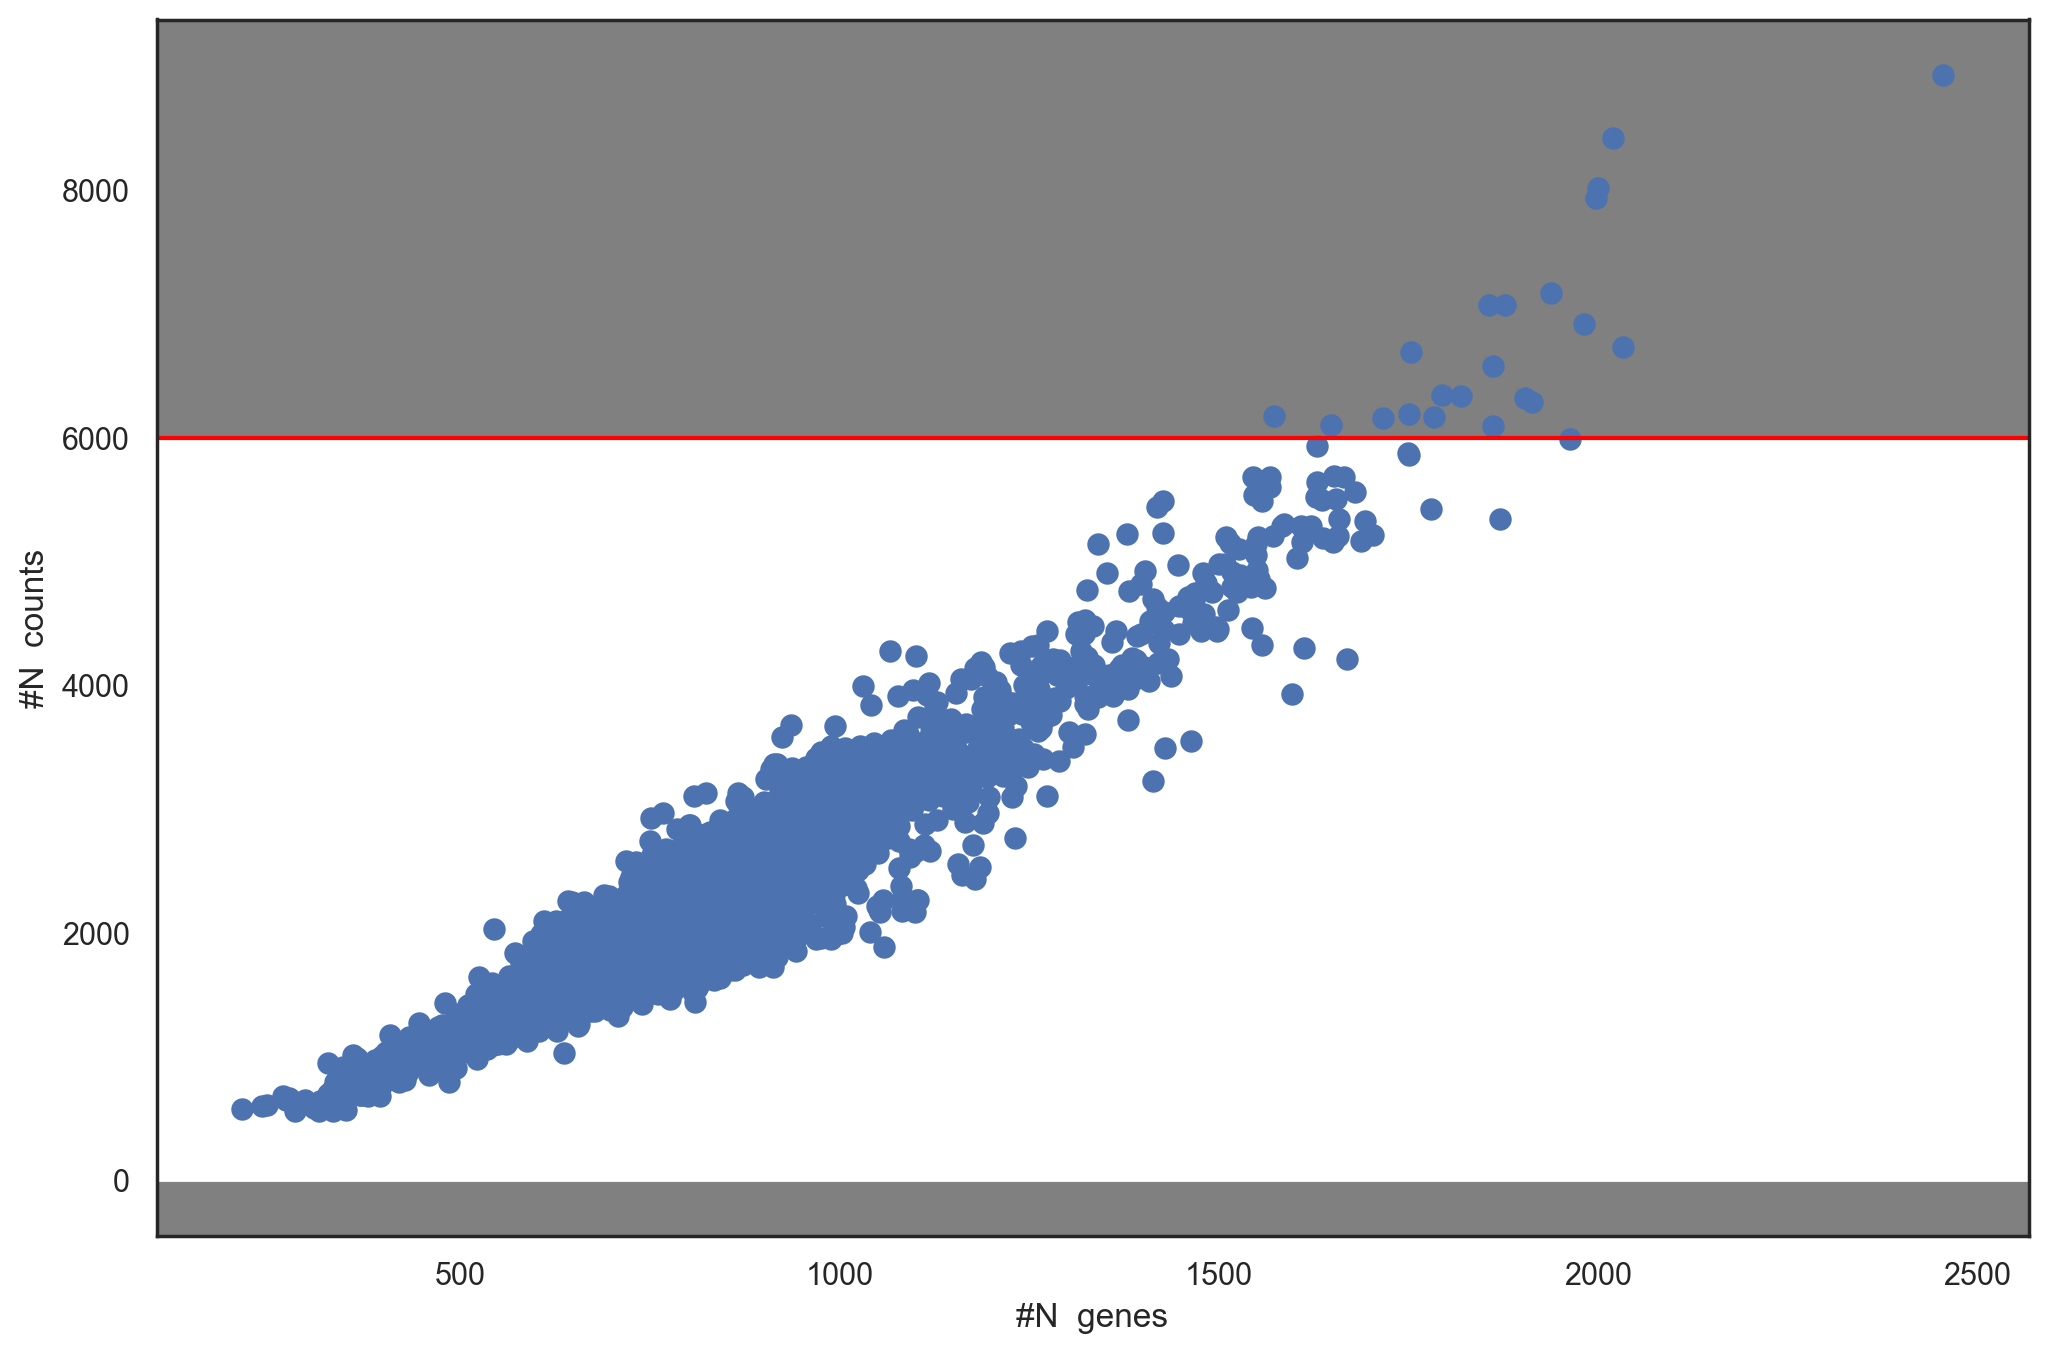

Used max_counts is 6000


In [31]:
# Thresholding decision: cells

scg.pp.plot_filter_cells(adata, max_counts=6000, dot=50, fig_size=(12,8))

In [13]:
# cells with too many counts are probaly doublet cells thats why we filter them
adata = scg.pp.filter_cells(adata, max_counts=6000)

Total number of cells: 2638
Number of cells after min genes filter: 2638
filtered out 21 cells that have more than 6000 counts
Number of cells after max count filter: 2617


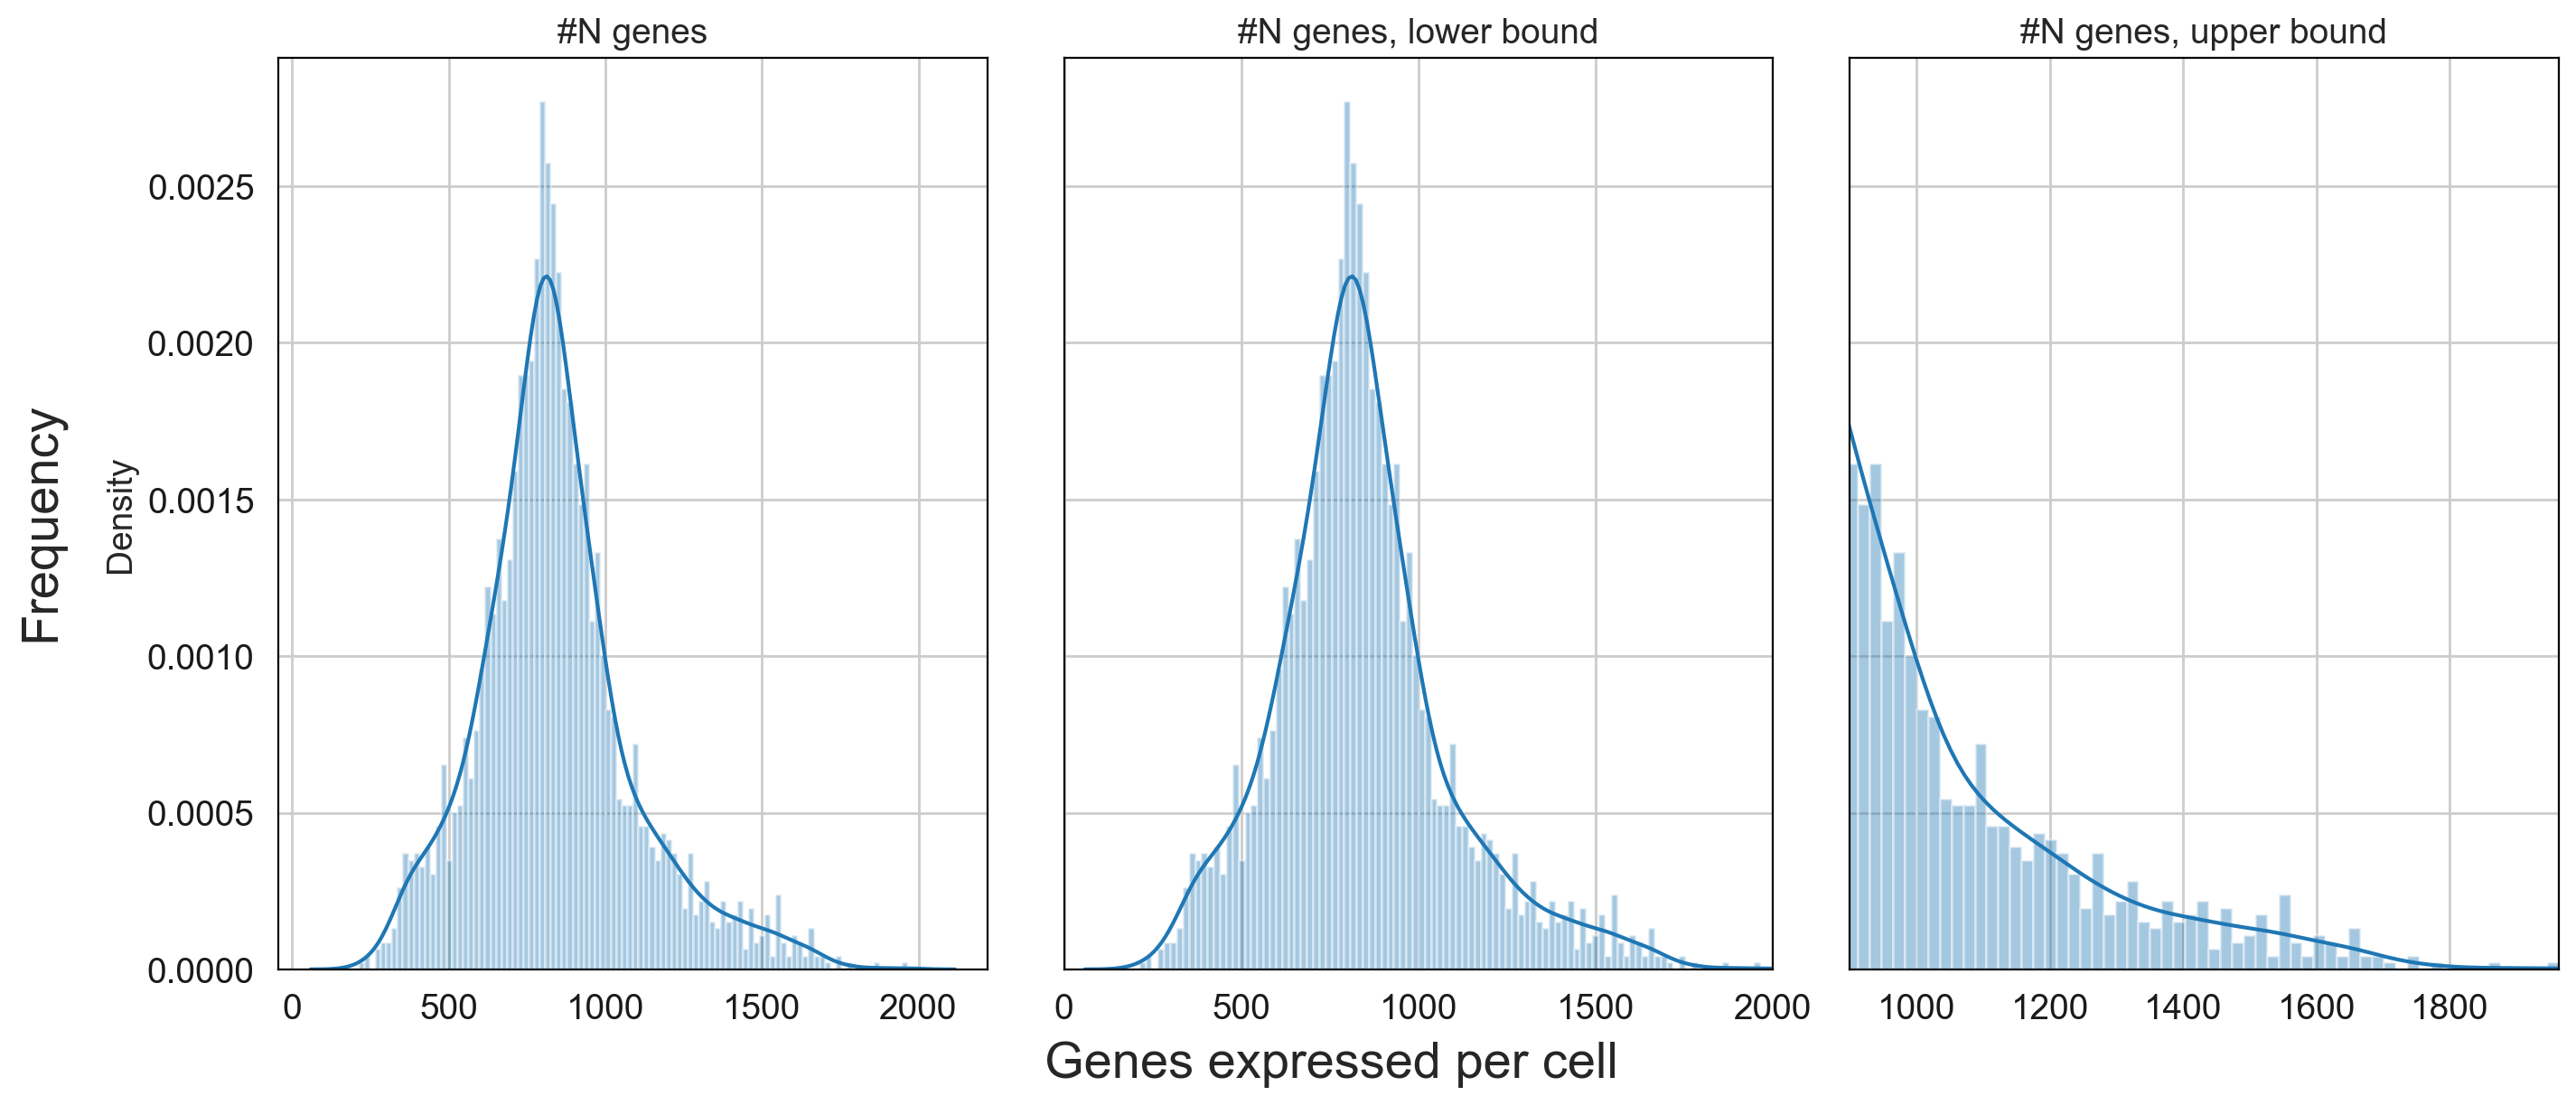

In [14]:
# Filter cells based on how mnay expressed genes (we want to keep it as a noraml distrubition and avoid noise picks)
# Thresholding decision: genes
# see it in case on cell filtiring
# plot it blindly for the first time then adjust the bounds to zoom in at the tails for an easy decision

scg.pp.plot_cells_by_n_genes(adata, lowerbound=2000, upperbound=900, nbins=100, fig_size=(14,6))

In [15]:
adata = scg.pp.filter_cells_by_n_genes(adata, min_n_genes=500, max_n_genes=7500)

Total number of cells: 2617
Number of cells after cell filter: 2429


In [16]:
# Filter (low detected genes) genes based on how mnay cells that they are expressed in 

adata = scg.pp.filter_genes(adata, min_cells=50)

Total number of genes: 16579
filtered out 9704 genes that are detected in less than 50 cells
Number of genes after filtering: 6875


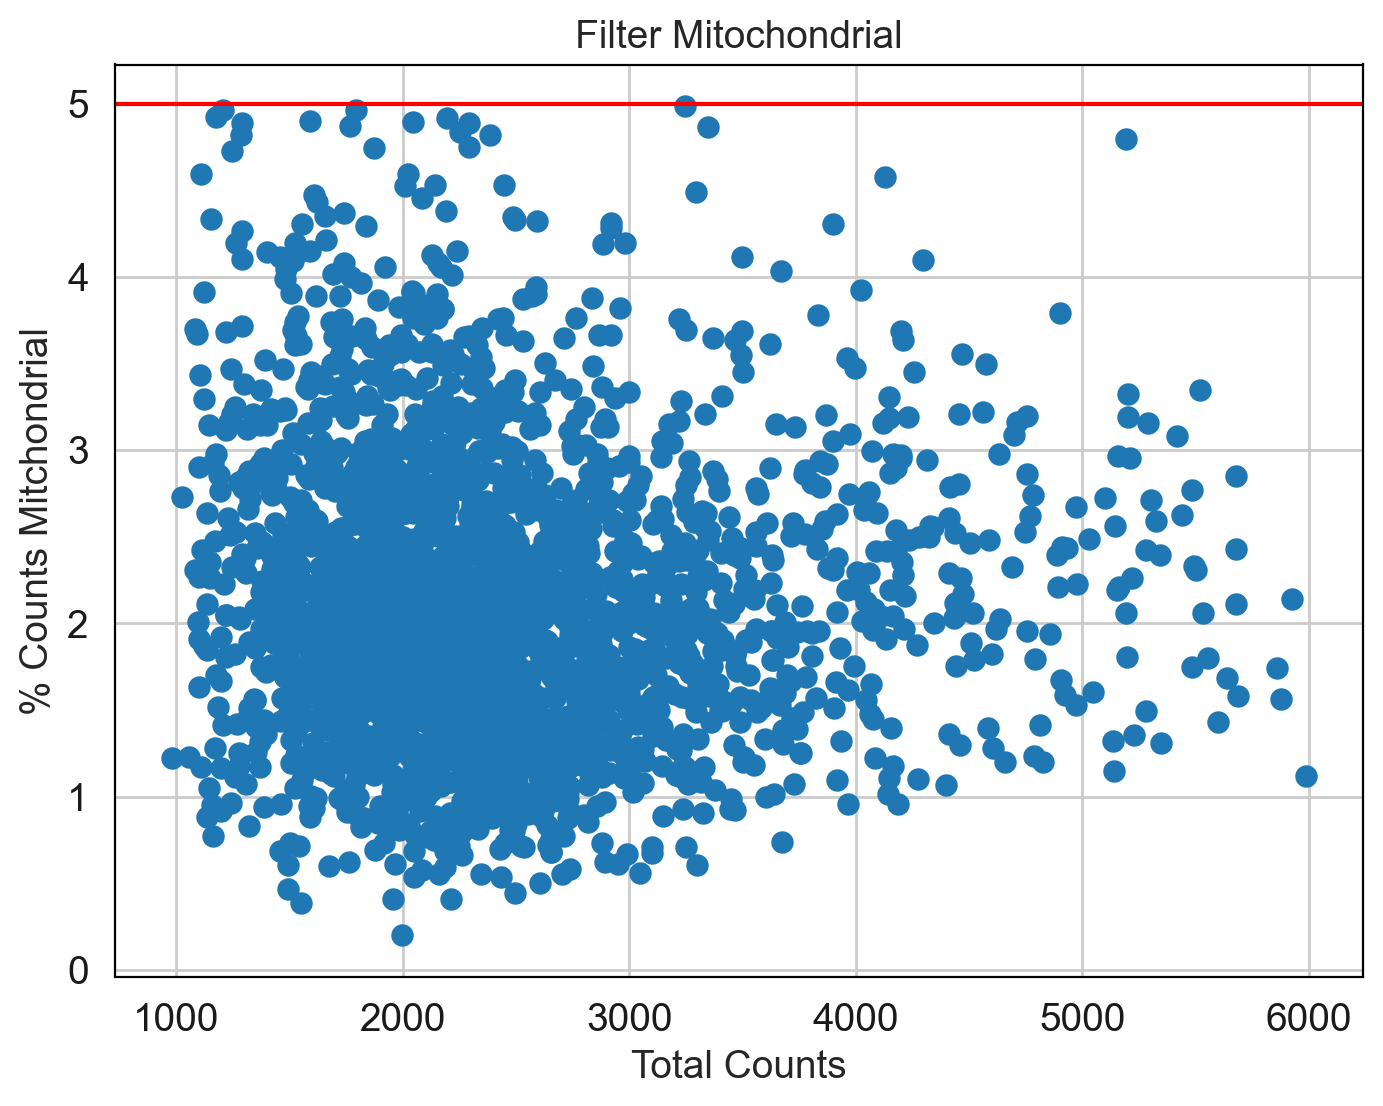

In [17]:
# Use Mitochondrial gene expression levels to filter out broken cells.
scg.pp.plot_filter_mitochondrial(adata, thres=5, dot=50, fig_size=(8,6))

In [18]:
adata = scg.pp.filter_mitochondrial(adata, max_mt_percent=5)

Total number of cells: 2429
Number of cells after MT filter: 2429


In [19]:
# TODO get red of warnings
# Do not log&normalize twice!!!

adata = scg.pp.log_normalize(adata, target_sum=1e6, use_log=True)

normalizing counts per cell
    finished (0:00:00)


If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)

 Number of highly variable genes: 2000


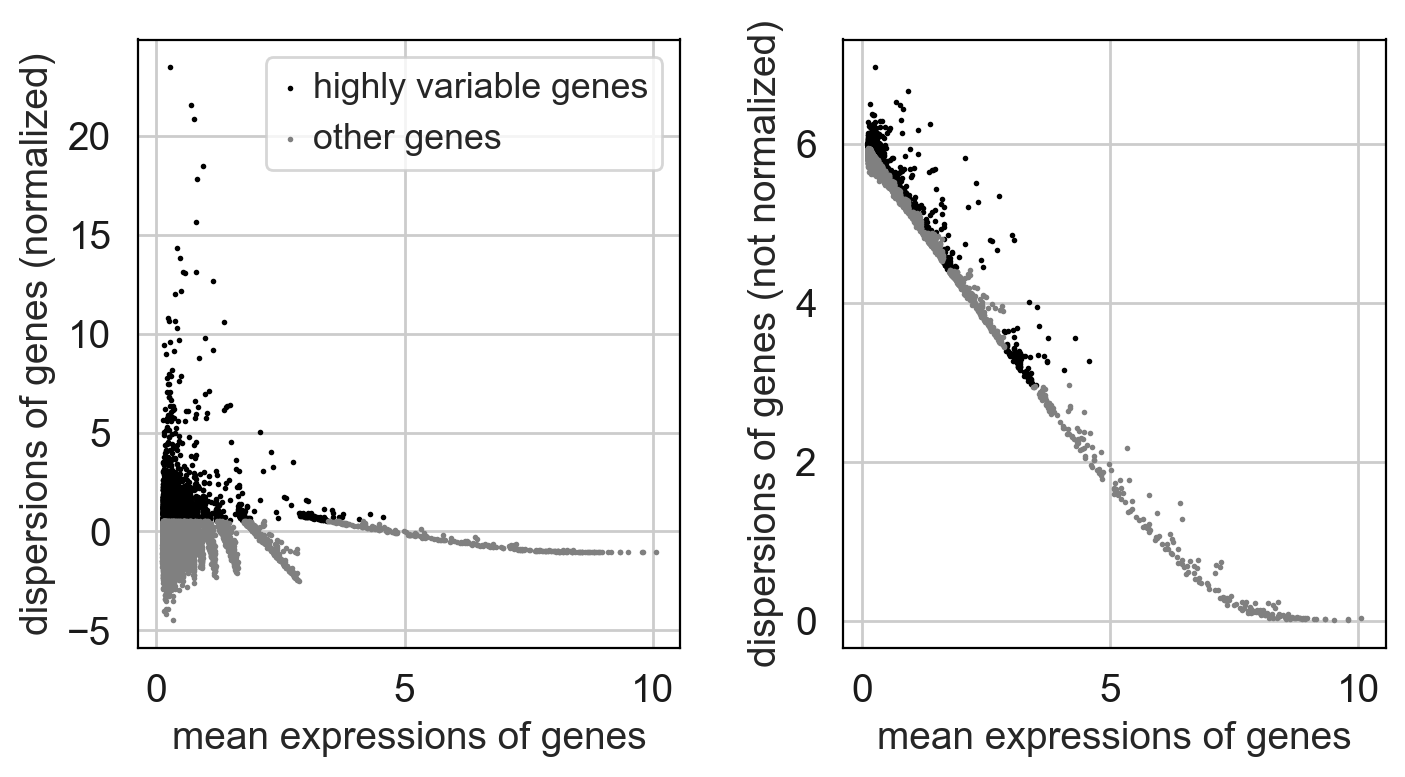

In [20]:
# TODO this is an important step as we need to use only some genes for the analysis not all genes !!!
adata = scg.pp.extract_highly_variable_genes(adata, n_top_genes=2000, plot=True)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


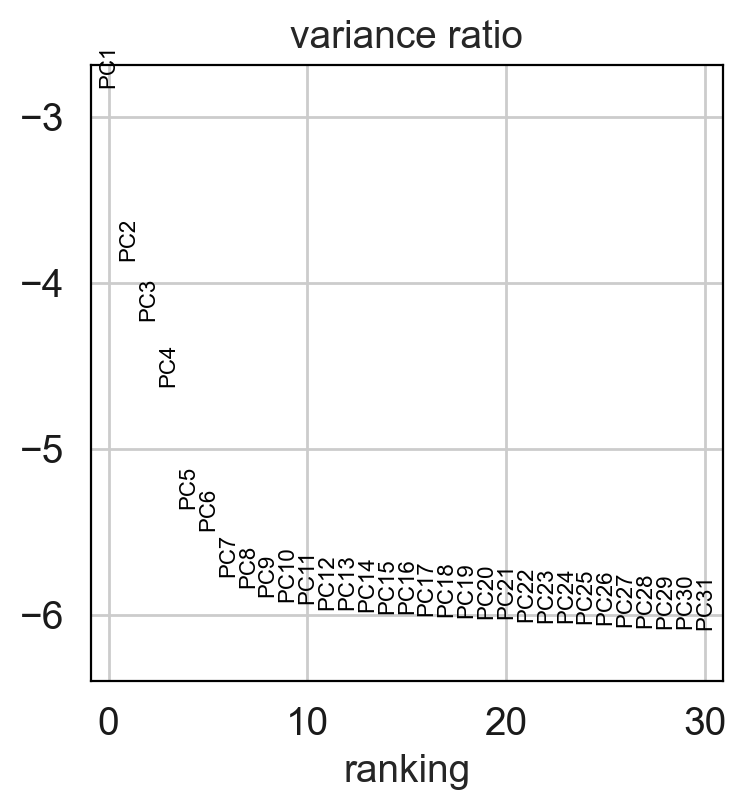

In [23]:
scg.pl.dimensionality_reduction_parameters(adata)

In [24]:
adata = scg.pl.dimensionality_reduction(adata, method="UMAP", n_pcs=10, n_neighbors=10)

Calculating dimensionality reduction :UMAP
computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
it tooks :0.15081883271535237 minutes.


In [34]:
scg.pl.visualization(adata, method="UMAP", color=cell_annotation)

NameError: name 'cell_annotation' is not defined

In [30]:
name_prproc = "databases/"+data_path.split("/")[-1].split(".h5ad")[0]+"_SCANprocessed_.h5ad"
adata.write_h5ad(name_prproc)

In [32]:
# in case you dont want to do pr-processing start from here 
# Read the data 

data_path = "databases/pbmc3k_row_SCANprocessed_.h5ad"
adata = scg.pp.read_h5ad(data_path)
adata

AnnData object with n_obs × n_vars = 2429 × 2000
    obs: 'louvain', 'percent_mito', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts'
    var: 'gene_ids', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'log1p', 'louvain_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [38]:
cell_annotation

'louvain'

In [39]:
adata_new = scg.pb.representative_cells(adata, num_rep_cells=100, cell_anno=cell_annotation)
adata_new

clusters in the data louvain
CD4 T cells          1144
CD14+ Monocytes       480
B cells               342
CD8 T cells           316
NK cells              154
FCGR3A+ Monocytes     150
Dendritic cells        37
Megakaryocytes         15
dtype: int64

The following cell clusters will be deletedas their size if less than the specified number ofrepresentative cells:
['Dendritic cells', 'Megakaryocytes']

Selected representative cells for each cluster __SCANclusters__
B cells              100
CD14+ Monocytes      100
CD4 T cells          100
CD8 T cells          100
FCGR3A+ Monocytes    100
NK cells             100
dtype: int64


AnnData object with n_obs × n_vars = 600 × 16579
    obs: '__SCANclusters__'
    var: 'Genes'

computing PCA
    with n_comps=50
    finished (0:00:01)


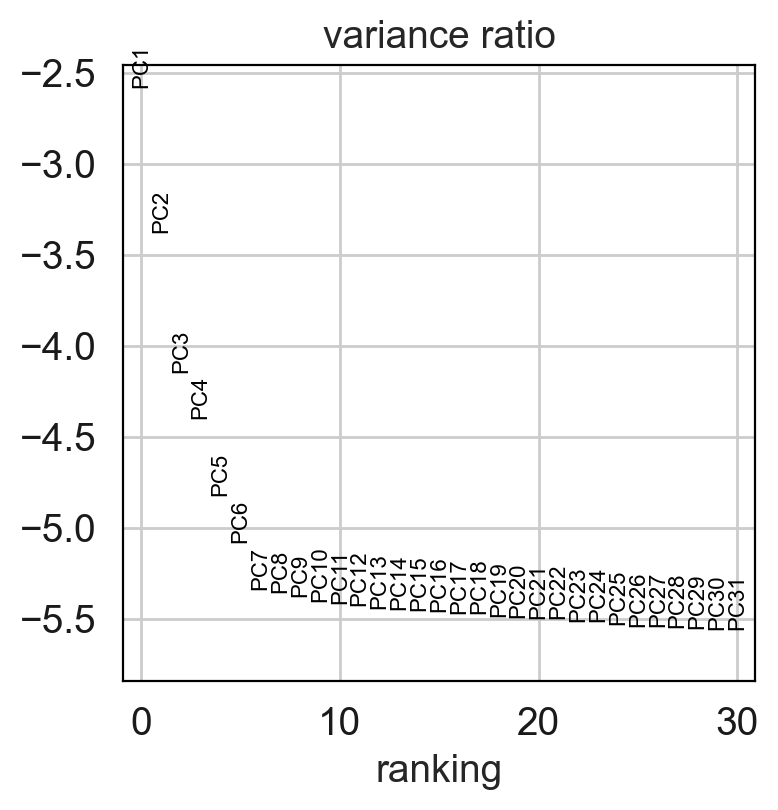

In [38]:
scg.pl.dimensionality_reduction_parameters(adata_new)

In [39]:
adata_new = scg.pl.dimensionality_reduction(adata_new, method="UMAP", n_pcs=10, n_neighbors=5)

Calculating dimensionality reduction :UMAP
computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)
it tooks :0.03699791431427002 minutes.



 Available method are: PCA, t-SNE,  UMAP, or ALL


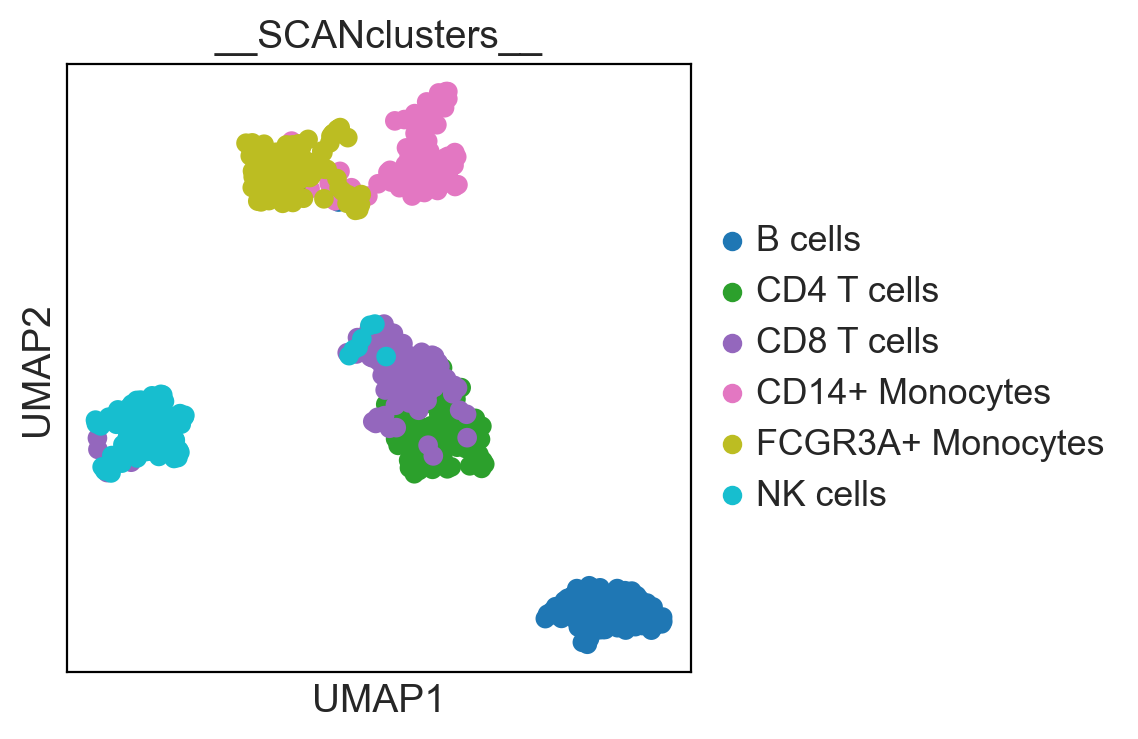

In [40]:
scg.pl.visualization(adata_new, method="UMAP", color='__SCANclusters__')

In [43]:
name_reduced = "databases/"+data_path.split("/")[-1].split(".h5ad")[0]+"_reduced_.h5ad"
name_reduced

'databases/pbmc3k_row_SCANprocessed__reduced_.h5ad'

In [44]:
adata_new.write_h5ad(name_reduced)

In [128]:
# cO-expression analysis

In [47]:
data_path = "databases/pbmc3k_row_SCANprocessed__reduced_.h5ad"
adata = scg.pp.read_h5ad(data_path)
adata

AnnData object with n_obs × n_vars = 600 × 2000
    obs: '__SCANclusters__'
    var: 'Genes'
    uns: '__SCANclusters___colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [48]:
adata = adata[:,:2000]
adata

View of AnnData object with n_obs × n_vars = 600 × 2000
    obs: '__SCANclusters__'
    var: 'Genes'
    uns: '__SCANclusters___colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [138]:
# state all possible paramter values 

# net_type Network type. One of ’signed’, ’signed hybrid’ or ’unsigned’. Default: ’signed’.
# module_merging_threshold
# Correlation threshold to merge similar modules into a single one. Default: 0.8.
# SFTpower SFT power generated by the function SFT_fit.
# cor_method Correlation method. One of "pearson", "biweight" or "spearman". Default is
# "spearman".

In [40]:
power_ = scg.co.plot_powers(adata, network_type="unsigned", cor_method="pearson")
power_

UnboundLocalError: local variable 'path_r_script' referenced before assignment

In [52]:
net = scg.co.n.co_expression(adata, network_type="unsigned", cor_method="pearson", power=power_, module_merging_threshold=0.7)

Data dimension is : 600 Cells and 2000 Genes
[1] 2000  600
[1] "Removing outlier cells ..."
[1] "Removed 0 cells ..."
[1] 2000  600
..connectivity..
..matrix multiplication (system BLAS)..
..normalization..
..done.


Plotting the dendrogram
NULL


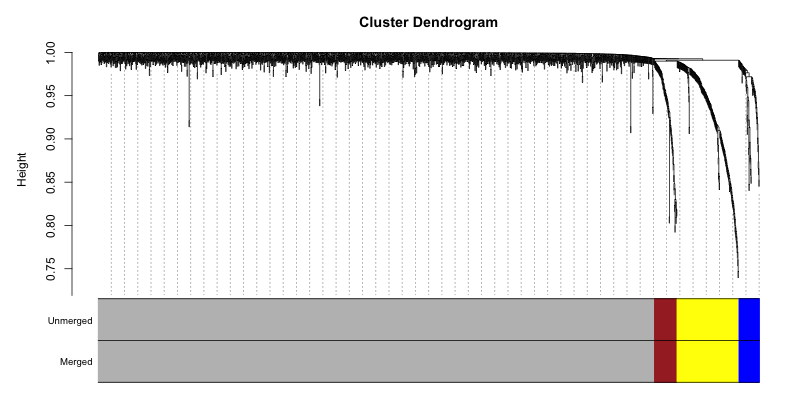

In [53]:
scg.co.plot_dendrogram(net,  fig_size=(800,400))

Plotting the eigengene network
NULL


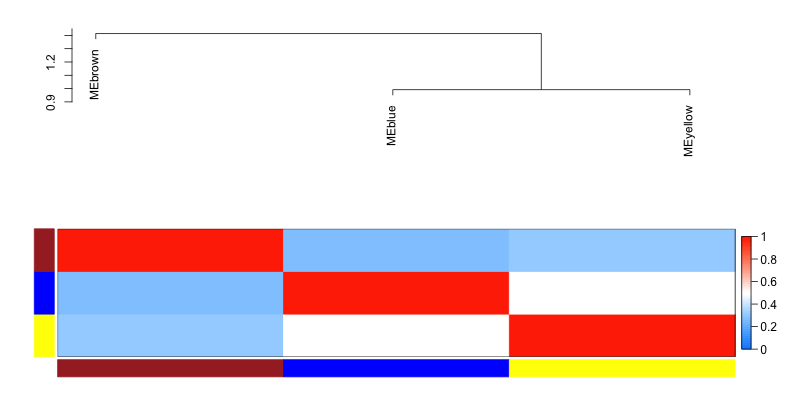

In [54]:
scg.co.plot_eigengene_network(net, fig_size=(800,400))

Plotting the modules


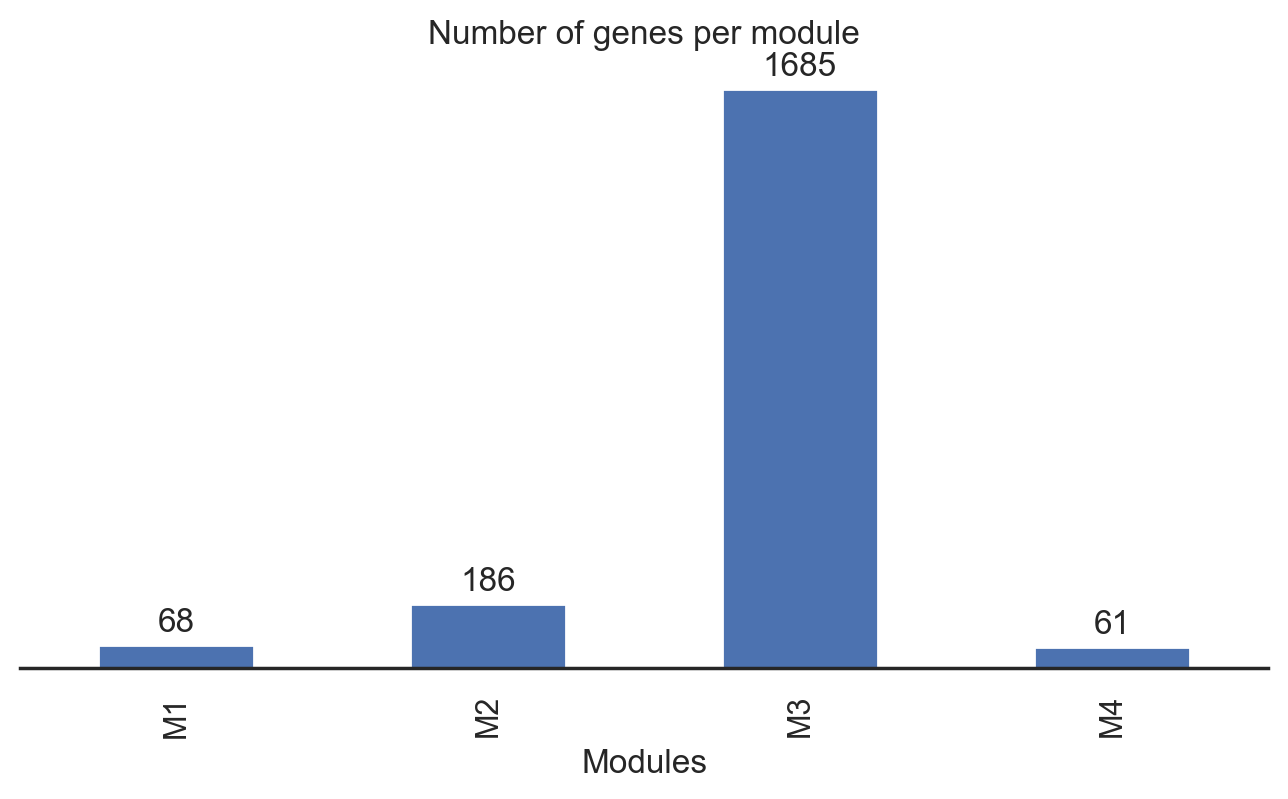

TODO remove this df from return


,Modules,n_genes,genes
0,M1,68,"[""CD160"", ""SH2D2A"", ""PYHIN1"", ""FCRL6"", ""SH2D1B..."
1,M2,186,"[""ISG15"", ""RBP7"", ""AGTRAP"", ""EFHD2"", ""CDA"", ""W..."
2,M3,1685,"[""TNFRSF18"", ""TNFRSF4"", ""SDF4"", ""B3GALT6"", ""CP..."
3,M4,61,"[""FCGR2B"", ""FCRLA"", ""EAF2"", ""TLR10"", ""SMIM14"",..."


In [55]:
df_modules = scg.co.plot_modules(net, figsize=(8,4))
df_modules.head()

Data dimension is : 600 Cells and 2000 Genes
[1] 2000  600
[1] "Removing outlier cells ..."
[1] "Removed 0 cells ..."
[1] 2000  600


,Modules,annotation,cor,pvalue
1,M4,B.cells,0.643975,1.409067e-71
2,M4,CD14..Monocytes,0.245728,1.058609e-09
3,M4,CD4.T.cells,-0.450532,2.490866e-31
4,M4,CD8.T.cells,-0.387351,6.477082e-23
5,M4,FCGR3A..Monocytes,0.248775,6.475342e-10


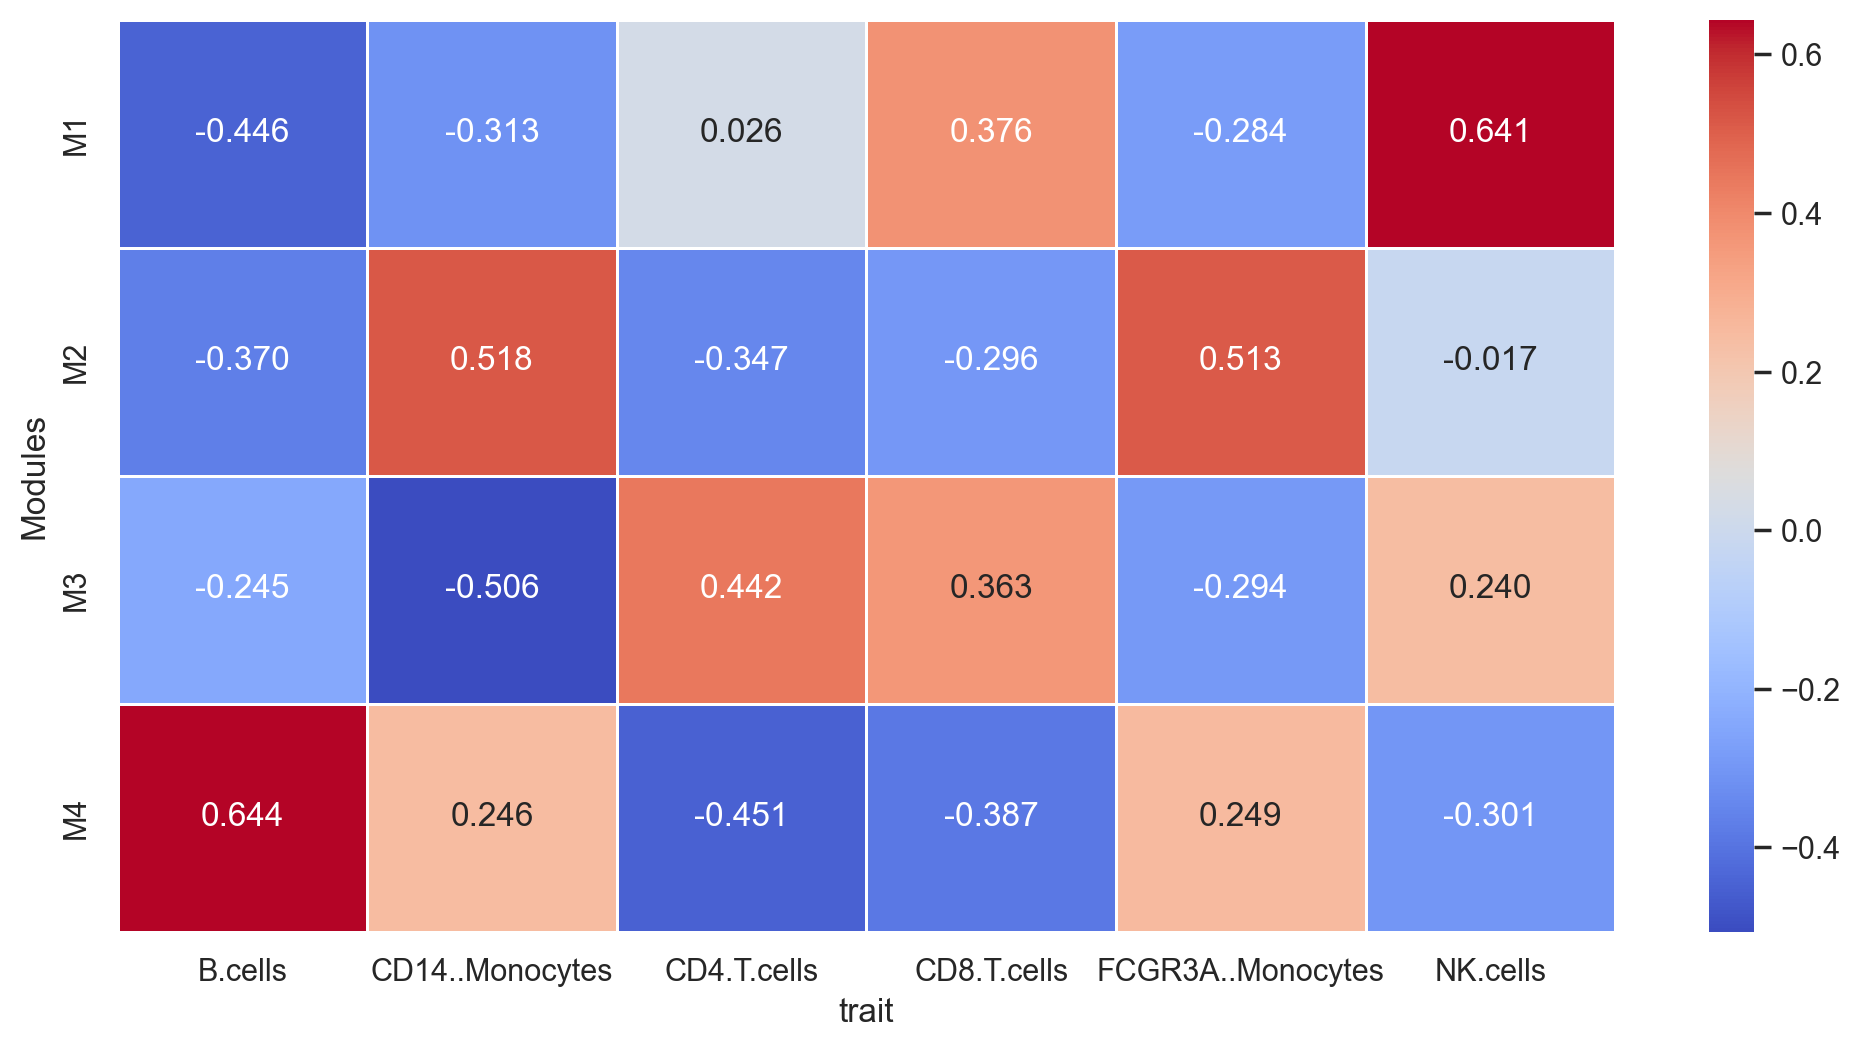

In [56]:
cor = scg.co.modules_to_annotation_cor(adata, net, figsize=(12,6))
cor.head(5)

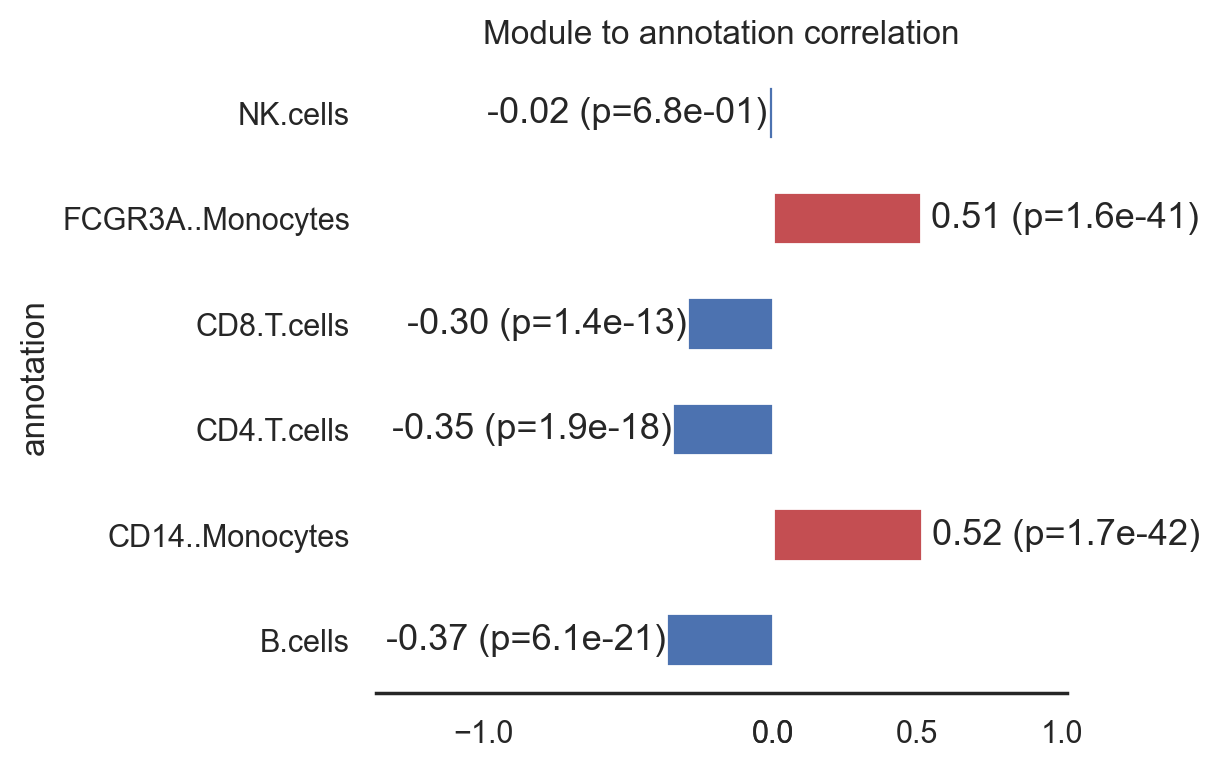

In [57]:
scg.co.module_to_annotation_cor(cor, module = "M2", figsize=(6,4))

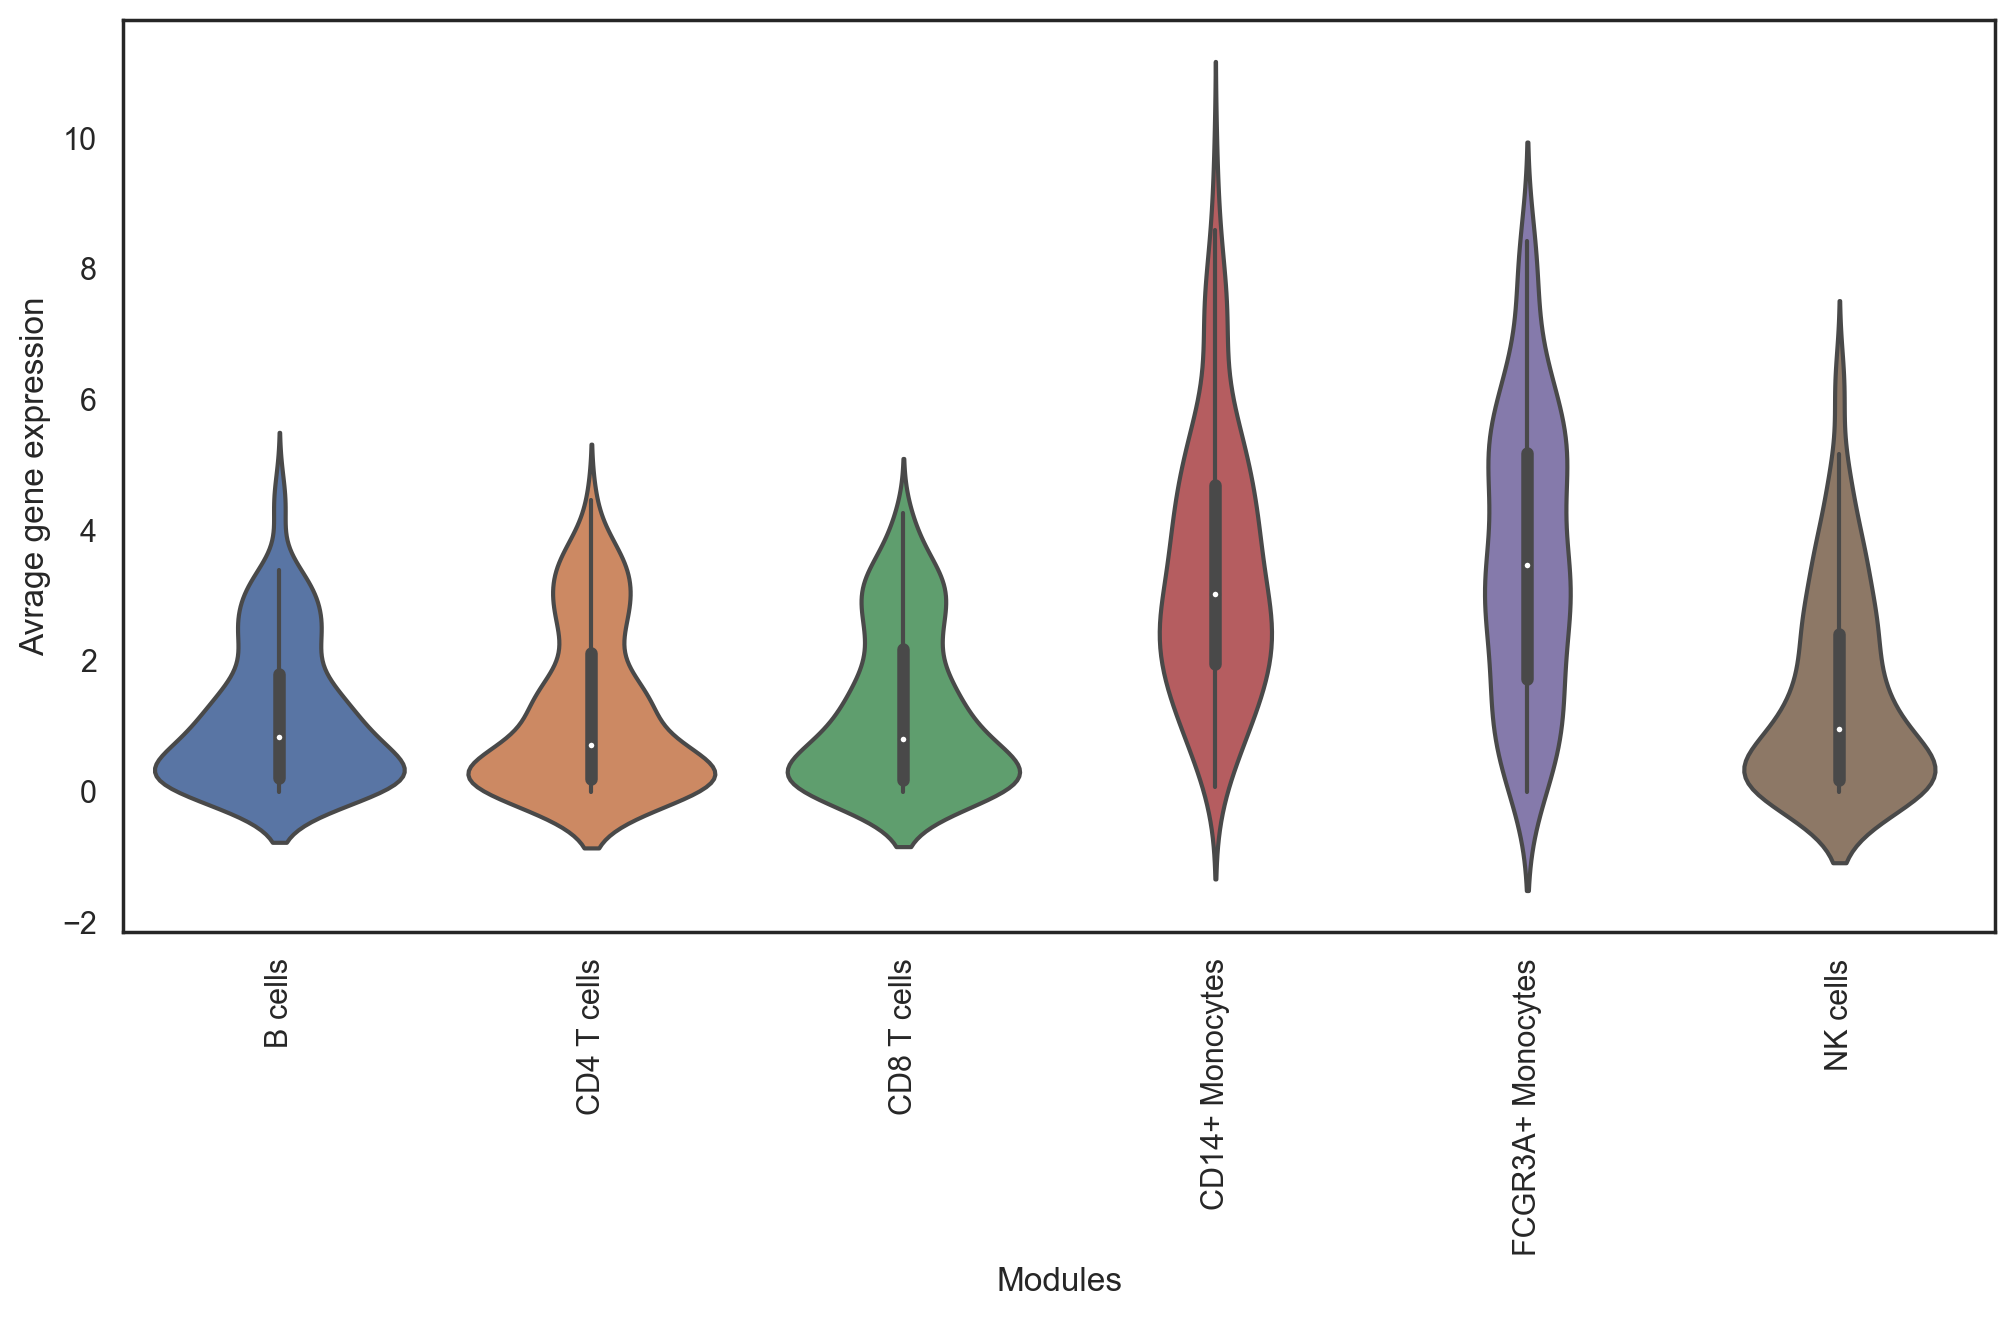

In [58]:
scg.co.Module_Genes_Avrage_Expr(module = "M2", adata = adata, figsize=(12,6))

Plotting Module Membership


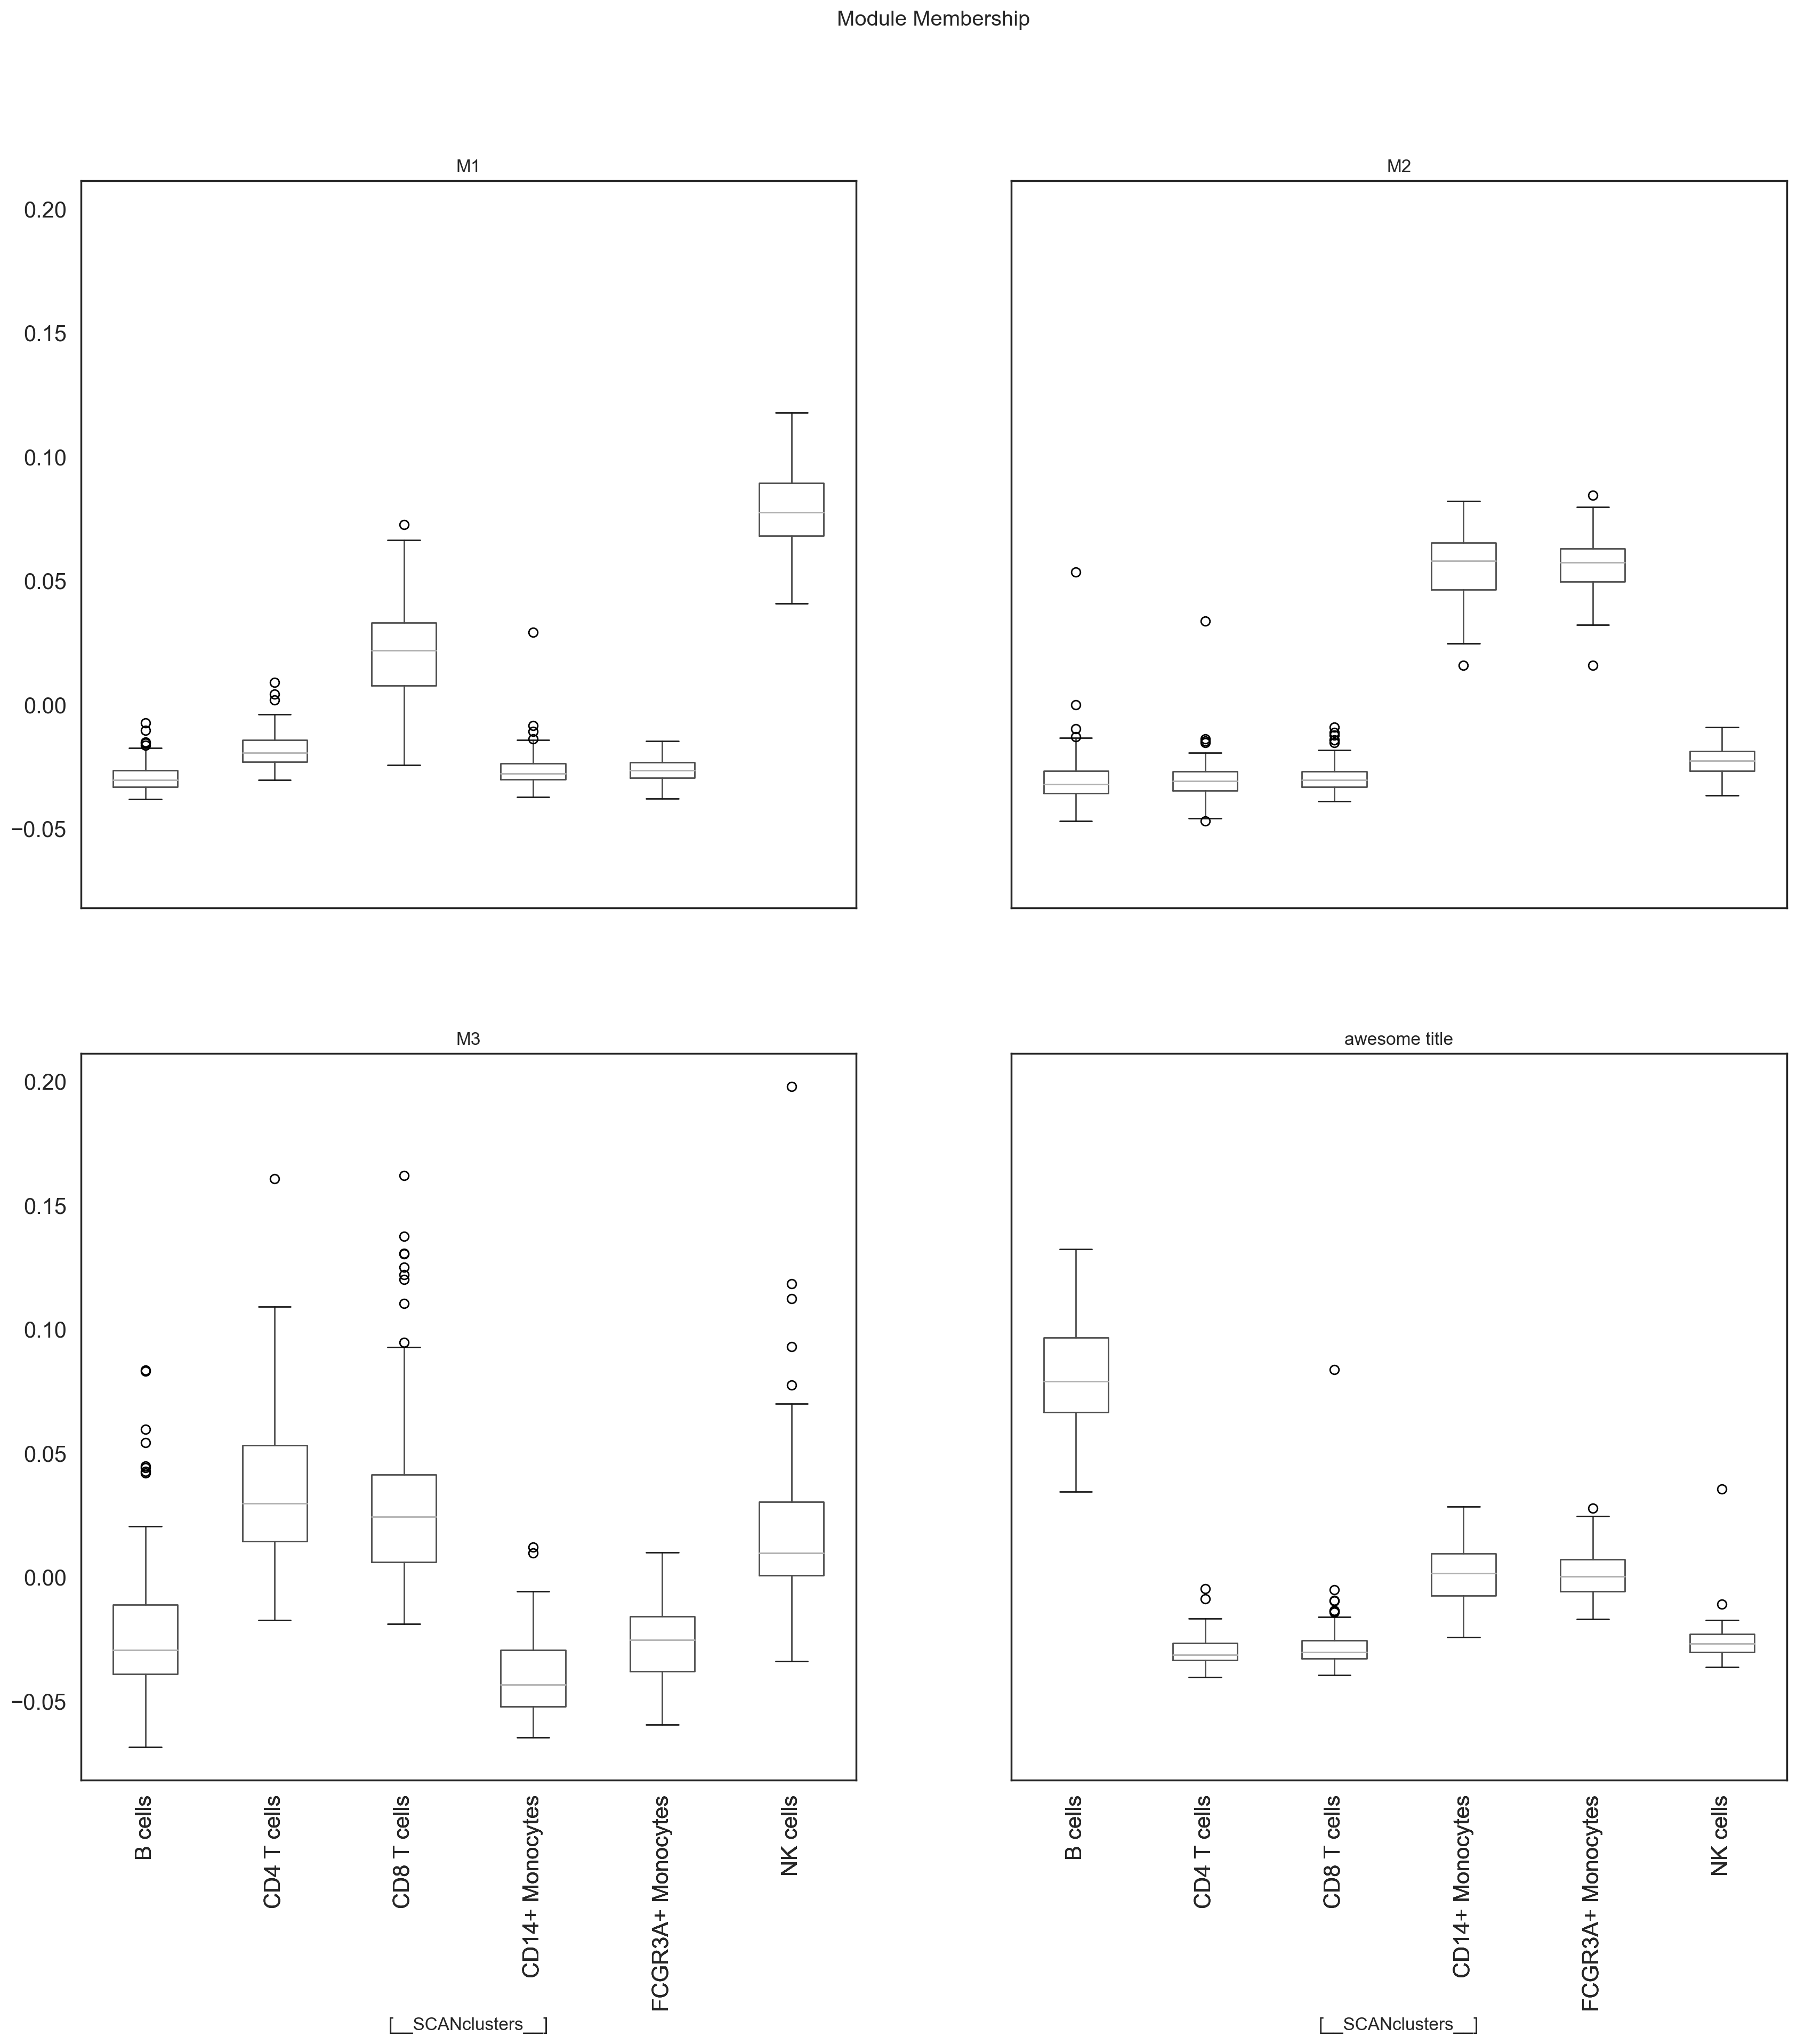

In [59]:
module_membership_df = scg.co.plot_module_membership(net, adata=adata, figsize=(20,20))

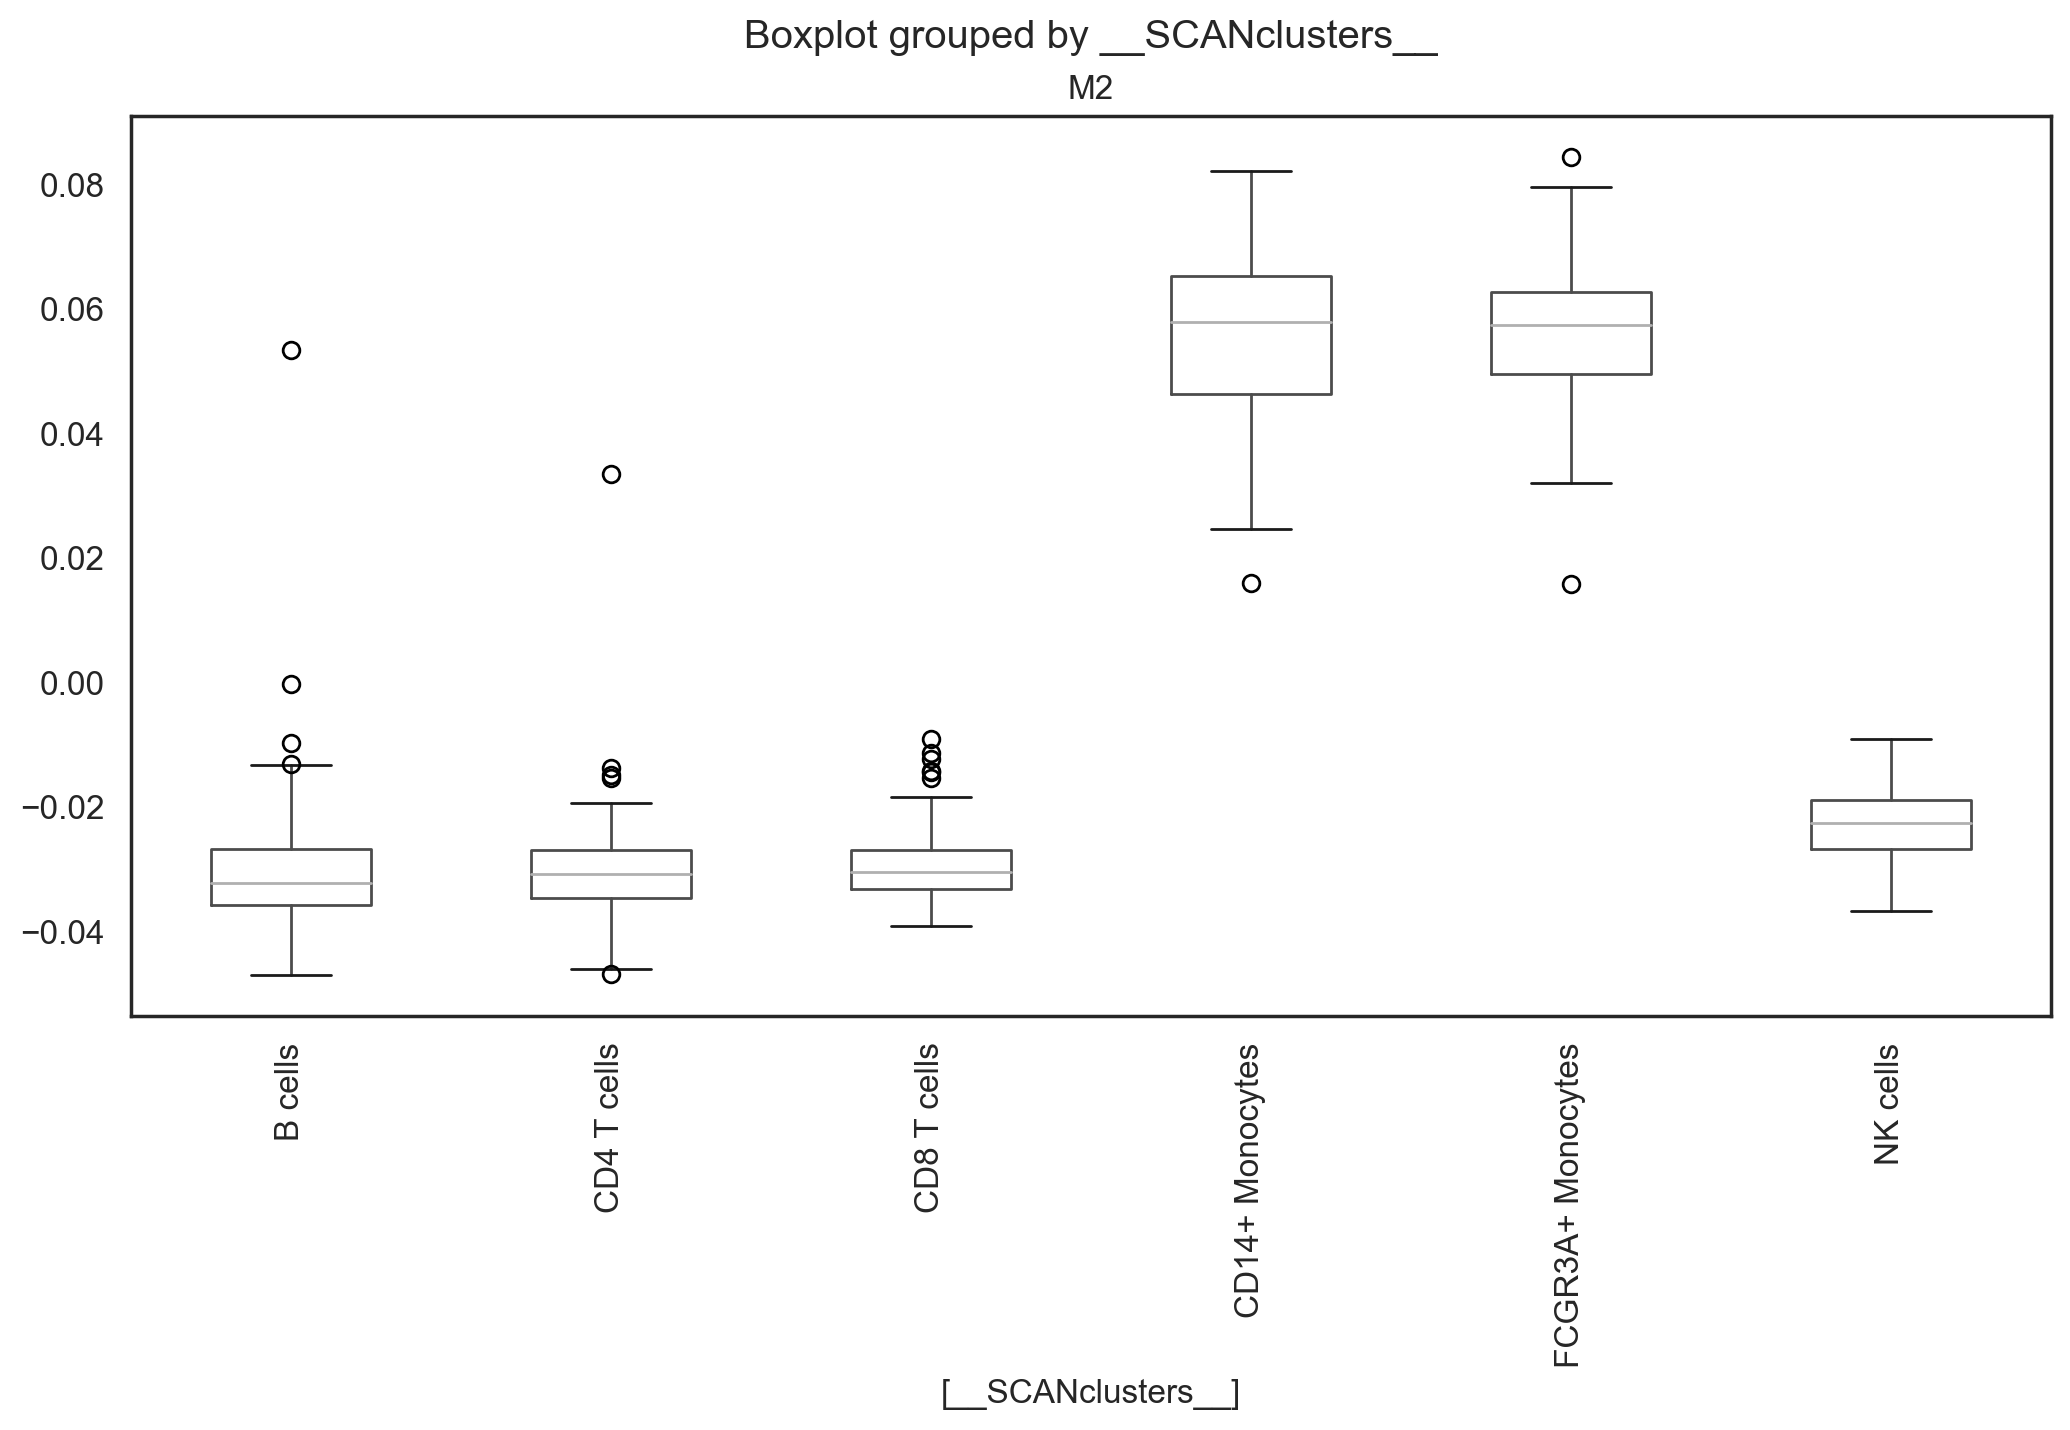

In [60]:
scg.co.Module_Activity(module="M2", plot_type="box", df = module_membership_df, figsize=(12,6))

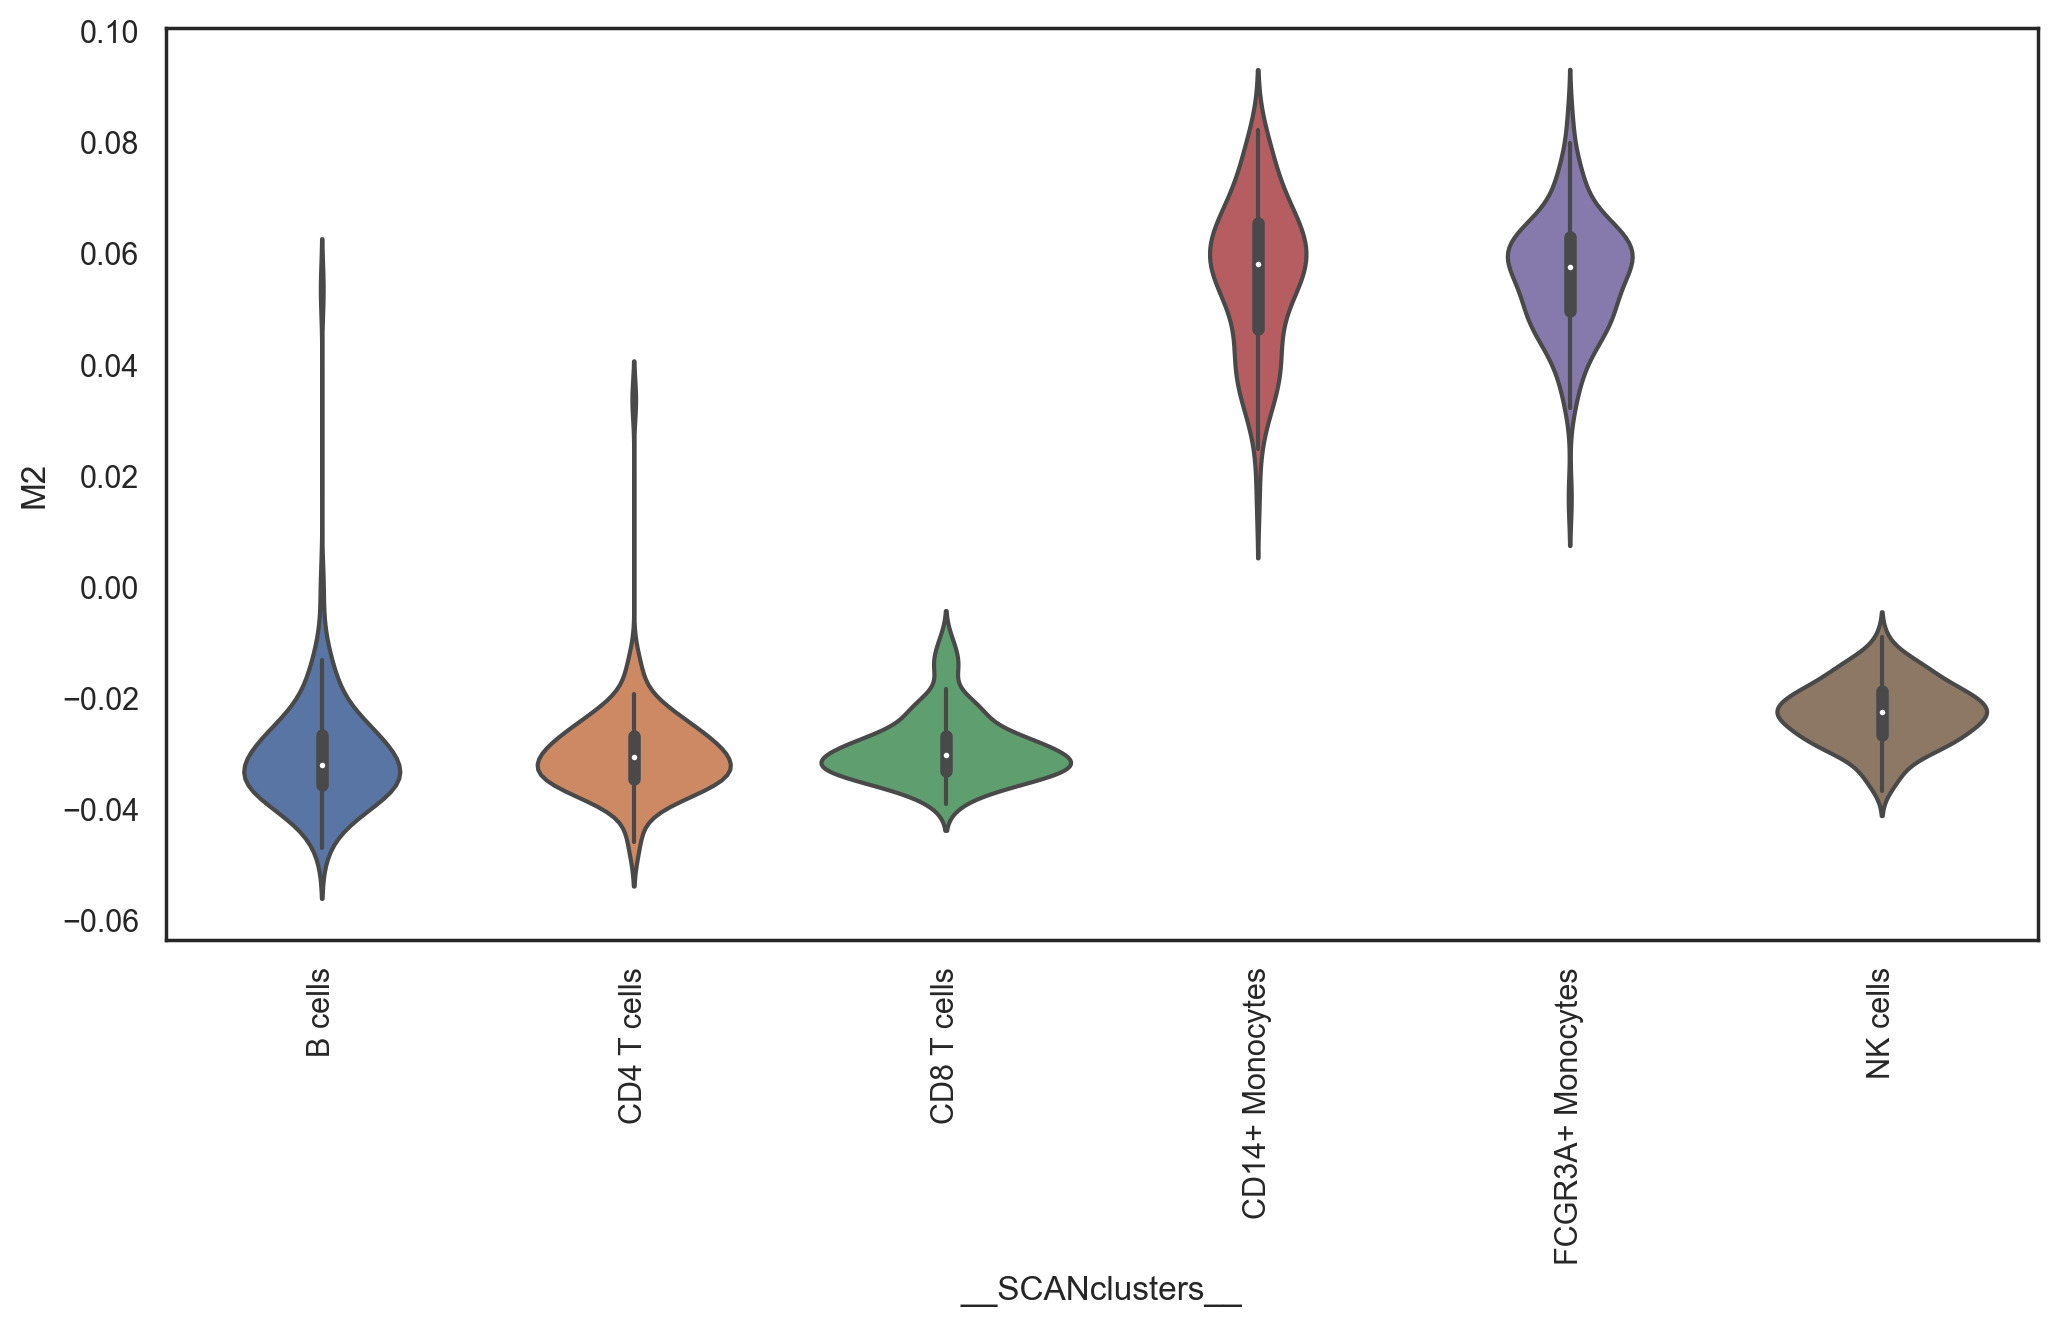

In [61]:
scg.co.Module_Activity(module="M2", plot_type="violin", df = module_membership_df, figsize=(12,6))

Data dimension is : 600 Cells and 2000 Genes
[1] 2000  600
[1] "Removing outlier cells ..."
[1] "Removed 0 cells ..."
[1] 2000  600


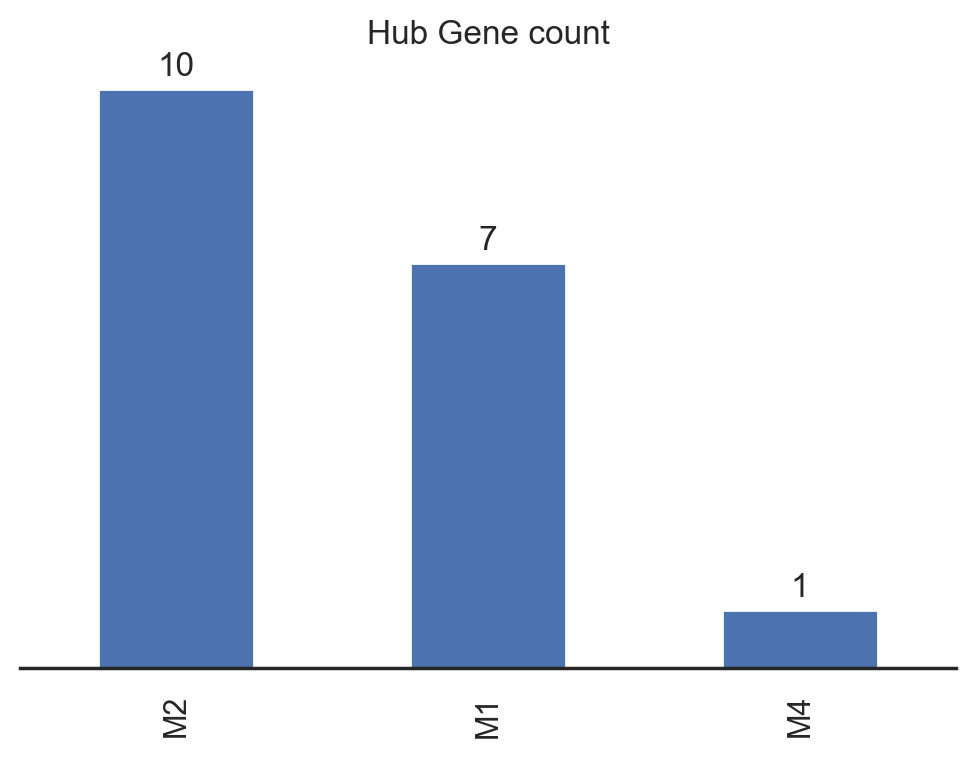

,Gene,kWithin,Modules
0,CD79A,5.255584,M4
1,GZMB,7.547488,M1
2,GZMA,6.824248,M1
3,CST7,6.677150,M1
4,PRF1,6.501048,M1


In [62]:
# Hub genes

hub_genes_df = scg.co.hub_genes(adata=adata, net=net, figsize=(6,4))
hub_genes_df.head(5)

In [64]:
# TODO error what is 
network_ = scg.co.module_to_network(net, module = "M2", co_cutoff=0.7)
network_

Your graph fits the scale-free topology. P-value:0.999999998537941
Using a correlation cut-off of 0.7 found 54 edges
There are 23 unique genes


,Gene1,Gene2,Weight,Module
3178,S100A9,S100A8,0.712829,M2
9874,S100A9,AIF1,0.718570,M2
9911,LST1,AIF1,0.791753,M2
13817,LST1,CFP,0.731331,M2
13818,AIF1,CFP,0.780825,M2
17165,LST1,IFITM3,0.718406,M2
17166,AIF1,IFITM3,0.765321,M2
17187,CFP,IFITM3,0.733816,M2
17537,LST1,SPI1,0.717002,M2
17538,AIF1,SPI1,0.734841,M2


In [67]:
scg.pln.plot_gcn(network_=network_,hub_genes_df=hub_genes_df, name="gcn_network", drug_interaction=True, smooth_edges=True)

Hub genes: ['CFD', 'AIF1', 'CD68', 'CFP', 'LST1', 'CST3', 'SERPINA1', 'SPI1', 'IFITM3', 'TYMP']


In [87]:
scg.pln.plot_gcn(network_=network_,hub_genes_df=hub_genes_df, name="gcn+drugs", drug_interaction="all", smooth_edges=True)

Hub genes: ['CFD', 'AIF1', 'CD68', 'CFP', 'LST1', 'CST3', 'SERPINA1', 'SPI1', 'IFITM3', 'TYMP']


JSONDecodeError: [Errno Expecting value] <html>
<head><title>405 Not Allowed</title></head>
<body>
<center><h1>405 Not Allowed</h1></center>
<hr><center>nginx/1.19.4</center>
</body>
</html>
: 0

In [81]:
adata_new.obs.groupby(['__SCANclusters__']).size()

__SCANclusters__
B cells              100
CD4 T cells          100
CD8 T cells          100
CD14+ Monocytes      100
FCGR3A+ Monocytes    100
NK cells             100
dtype: int64

In [82]:
import pandas as pd

In [83]:
modules_df = pd.read_csv("outs_scan/genes_frequency_df.csv", index_col=0)
modules_df.head()

,Module_r,n_genes,genes,Modules
0,brown,68,"[""CD160"", ""SH2D2A"", ""PYHIN1"", ""FCRL6"", ""SH2D1B...",M1
1,yellow,186,"[""ISG15"", ""RBP7"", ""AGTRAP"", ""EFHD2"", ""CDA"", ""W...",M2
2,grey,1685,"[""TNFRSF18"", ""TNFRSF4"", ""SDF4"", ""B3GALT6"", ""CP...",M3
3,blue,61,"[""FCGR2B"", ""FCRLA"", ""EAF2"", ""TLR10"", ""SMIM14"",...",M4


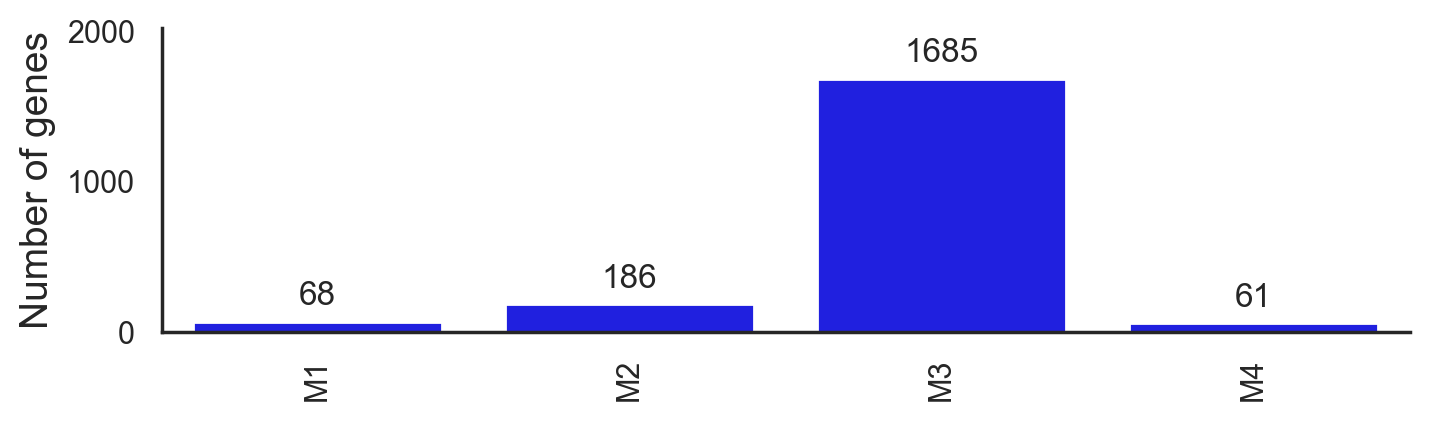

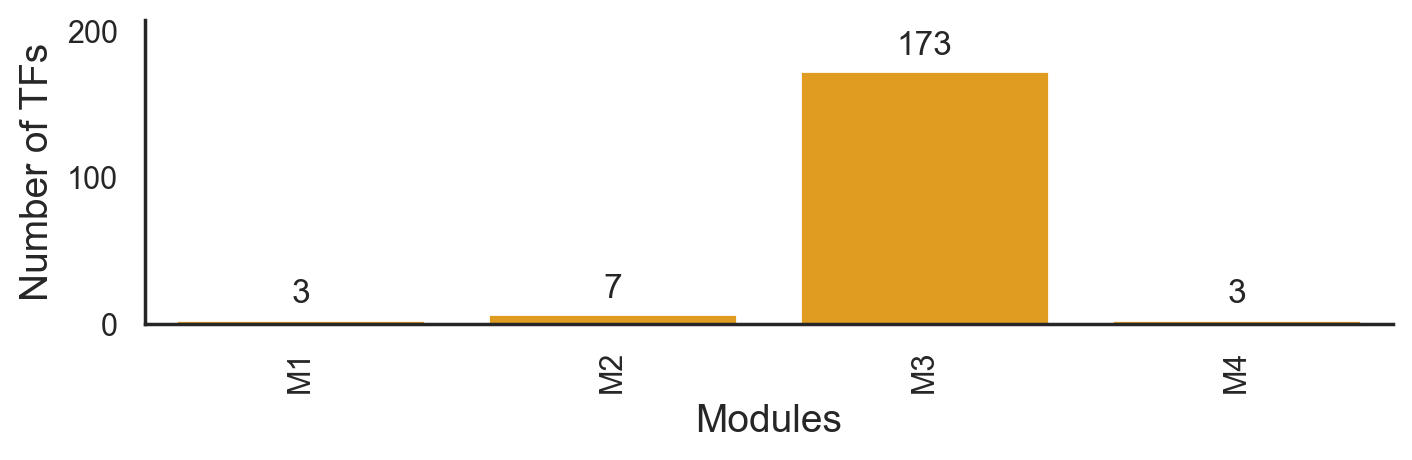

In [90]:
specie_ = 'human'
scg.grn.regulators_count(modules_df = modules_df, specie = specie_, figsize=(8,2))

In [94]:
# Get all processed data not the reduced one
adata_processed = sca.pp.read_h5ad("databases/pbmc3k_row_SCANprocessed_.h5ad")
adata_processed.obs.groupby([cell_annotation]).size()

louvain
CD4 T cells          1074
CD14+ Monocytes       421
B cells               306
CD8 T cells           299
NK cells              153
FCGR3A+ Monocytes     148
Dendritic cells        25
Megakaryocytes          3
dtype: int64

In [95]:
# remove all cluster not analyzed !important!

for x in list(set(list(adata_processed.obs[cell_annotation]))):
    if x not in list(set(list(adata.obs["__SCANclusters__"]))):
        adata_processed = adata_processed[adata_processed.obs[cell_annotation] != x]
adata_processed.obs.groupby([cell_annotation]).size()

louvain
CD4 T cells          1074
CD14+ Monocytes       421
B cells               306
CD8 T cells           299
NK cells              153
FCGR3A+ Monocytes     148
dtype: int64

In [96]:
anno_name = "NK cells"
groupby_ = cell_annotation
Mod_ = "M3"
num_workers = 60

In [97]:
#TODO look into the files paths

In [101]:
grn_df = scg.grn.grn_inference(adata_processed=adata_processed,modules_df=modules_df, module=Mod_, groupby_=groupby_, anno_name=anno_name, specie=specie_, subsampling_pct=80, n_iteration=10, num_workers=num_workers)
grn_df.head()

This Module has 1685 genes.
173 Genes in this modules are regulatores (TFs).
TFs are: ['ZCCHC17', 'HDAC1', 'NFYC', 'AKR1A1', 'GADD45A', 'ARNT', 'SETDB1', 'CERS2', 'VPS72', 'KIAA0907', 'TAGLN2', 'ATF6', 'PARP1', 'ODC1', 'REL', 'UGP2', 'NR4A2', 'STAT4', 'CLK1', 'SATB1', 'EOMES', 'ZBTB20', 'ZNF148', 'TFDP2', 'DHX36', 'MYNN', 'ZNF639', 'NCBP2', 'ZNF595', 'ZNF721', 'MRPL1', 'LEF1', 'IRF2', 'ZNF131', 'BDP1', 'MEF2C', 'RIOK2', 'IRF1', 'AFF4', 'HNRNPA0', 'EGR1', 'NR3C1', 'ZFP62', 'DUSP22', 'SOX4', 'PPP1R10', 'ATF6B', 'BACH2', 'TBPL1', 'BCLAF1', 'EZR', 'ZNF92', 'ZNF394', 'ZKSCAN1', 'HBP1', 'ZNF800', 'CNOT4', 'CREB3L2', 'ZNF775', 'APEX2', 'LAS1L', 'CCDC25', 'HMBOX1', 'MYBL1', 'STAU2', 'RAD21', 'MED30', 'MYC', 'HSPA5', 'NPDC1', 'GATA3', 'ZNF33A', 'ZNF37A', 'ZNF33B', 'ZNF22', 'ARID5B', 'ANXA11', 'HHEX', 'MXI1', 'SMC3', 'ASCL2', 'ZNF195', 'HTATIP2', 'CD59', 'UBXN1', 'MAP4K2', 'ZBTB16', 'RBM7', 'ETS1', 'ZNF384', 'ATF7', 'SMARCC2', 'R3HDM2', 'DDIT3', 'NUP107', 'GIT2', 'NCOR2', 'RAN', 'FOXO1', 'DIS3',

In [179]:
scg.pln.plot_grn(df=grn_df, occurrence_pct=80, name="GRN_net", regulon="all", layout="None")


 Out of 1035 edges, 40 edges satisfying occurrence threshold 80% where kept 

['TBX21']
(40, 3)
None


In [181]:
scg.pln.plot_grn(df=grn_df, occurrence_pct=80, regulon="all", layout="None", drug_interaction="direct")


 Out of 1035 edges, 40 edges satisfying occurrence threshold 80% where kept 

['TBX21']
(40, 3)
None


INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:degree progress is at: 0.0%
INFO:root:de

['TBX21', 'ABI2', 'ACN9', 'APTX', 'ARHGAP15', 'ARL4A', 'ATP1A1', 'C5orf24', 'CAMK2G', 'CBFA2T2', 'CBLB', 'CD160', 'CHPF2', 'CLPX', 'CNOT8', 'EGR1', 'ETS1', 'FKBP5', 'GNB2', 'JAK1', 'LPAR5', 'MLEC', 'NAA35', 'PDLIM2', 'PEX2', 'PPAPDC1B', 'PPP1R3E', 'RASA2', 'RDH14', 'RUNX1', 'SKIL', 'SLC4A7', 'STIM2', 'TRAPPC1', 'USP7', 'YIPF4', 'YWHAB', 'ZBTB1', 'ZBTB16', 'ZNF770']
